In [1]:
# First I need to create the desirable dataframe from the source data...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

data = load_dataset("lukebarousse/data_jobs")

df = data["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
df_og = df.copy()


In [4]:
df_us = df[df["job_country"] == "United States"]

df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206292 entries, 0 to 785705
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        206292 non-null  object        
 1   job_title              206292 non-null  object        
 2   job_location           205505 non-null  object        
 3   job_via                206285 non-null  object        
 4   job_schedule_type      205099 non-null  object        
 5   job_work_from_home     206292 non-null  bool          
 6   search_location        206292 non-null  object        
 7   job_posted_date        206292 non-null  datetime64[ns]
 8   job_no_degree_mention  206292 non-null  bool          
 9   job_health_insurance   206292 non-null  bool          
 10  job_country            206292 non-null  object        
 11  salary_rate            25372 non-null   object        
 12  salary_year_avg        15766 non-null   float64  

In [5]:
df_us["job_posted_month"] = df_us["job_posted_date"].dt.strftime("%B")
df_us["job_posted_month_num"] = df_us["job_posted_date"].dt.strftime("%m")

df_us.head()

/tmp/ipykernel_37088/2683438943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us["job_posted_month"] = df_us["job_posted_date"].dt.strftime("%B")
/tmp/ipykernel_37088/2683438943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us["job_posted_month_num"] = df_us["job_posted_date"].dt.strftime("%m")


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_month_num
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June,06
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July,07
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November,11
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March,03
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April,04


In [6]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206292 entries, 0 to 785705
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        206292 non-null  object        
 1   job_title              206292 non-null  object        
 2   job_location           205505 non-null  object        
 3   job_via                206285 non-null  object        
 4   job_schedule_type      205099 non-null  object        
 5   job_work_from_home     206292 non-null  bool          
 6   search_location        206292 non-null  object        
 7   job_posted_date        206292 non-null  datetime64[ns]
 8   job_no_degree_mention  206292 non-null  bool          
 9   job_health_insurance   206292 non-null  bool          
 10  job_country            206292 non-null  object        
 11  salary_rate            25372 non-null   object        
 12  salary_year_avg        15766 non-null   float64  

In [7]:
df_us["job_posted_month_num"] = df_us["job_posted_month_num"].astype(float)

/tmp/ipykernel_37088/3247875611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us["job_posted_month_num"] = df_us["job_posted_month_num"].astype(float)


In [8]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206292 entries, 0 to 785705
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        206292 non-null  object        
 1   job_title              206292 non-null  object        
 2   job_location           205505 non-null  object        
 3   job_via                206285 non-null  object        
 4   job_schedule_type      205099 non-null  object        
 5   job_work_from_home     206292 non-null  bool          
 6   search_location        206292 non-null  object        
 7   job_posted_date        206292 non-null  datetime64[ns]
 8   job_no_degree_mention  206292 non-null  bool          
 9   job_health_insurance   206292 non-null  bool          
 10  job_country            206292 non-null  object        
 11  salary_rate            25372 non-null   object        
 12  salary_year_avg        15766 non-null   float64  

In [9]:
df_us.duplicated().any()

True

In [10]:
df_us.drop_duplicates(inplace=True)

df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206287 entries, 0 to 785705
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        206287 non-null  object        
 1   job_title              206287 non-null  object        
 2   job_location           205500 non-null  object        
 3   job_via                206280 non-null  object        
 4   job_schedule_type      205094 non-null  object        
 5   job_work_from_home     206287 non-null  bool          
 6   search_location        206287 non-null  object        
 7   job_posted_date        206287 non-null  datetime64[ns]
 8   job_no_degree_mention  206287 non-null  bool          
 9   job_health_insurance   206287 non-null  bool          
 10  job_country            206287 non-null  object        
 11  salary_rate            25371 non-null   object        
 12  salary_year_avg        15765 non-null   float64  

/tmp/ipykernel_37088/1498763510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us.drop_duplicates(inplace=True)


In [11]:
df_us_pivot = df_us.pivot_table(index = "job_posted_month", columns = "job_title_short", values = "job_posted_month_num", aggfunc = "size")


In [12]:
df_us_pivot = df_us_pivot.reset_index()
df_us_pivot["month_index"] = pd.to_datetime(df_us_pivot.job_posted_month, format = "%B").dt.month
df_us_pivot.sort_values(by = "month_index", ascending = True, inplace = True)
df_us_pivot.set_index("job_posted_month", inplace = True)
df_us_pivot.drop("month_index", axis = 1, inplace = True)
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4778,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1094,153
August,903,39,6633,3269,6318,68,1186,903,1515,194
September,897,50,4638,3224,4568,113,805,775,1014,228


In [13]:
top_3 = (df_us_pivot.sum()
         .sort_values(ascending = False)
         .head(3)
         .index.to_list())

top_3

# If I am using multiple methods then by putting the whole code in "()", I can code in multi-line

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [14]:
df1_us_pivot = df_us_pivot[top_3]

df1_us_pivot

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_posted_month,,,
January,8494,6915,2655
February,6124,4956,3060
March,6218,4778,3183
April,6049,4867,2801
May,4993,4377,2976
June,5683,4645,2893
July,5201,4876,2570
August,6633,6318,3269
September,4638,4568,3224


In [15]:
# Okay my fisrt dataframe i.e. df1_us_pivot is ready 
# Now I will import my second dataframe named df2_us_pivot from the website

In [16]:
df2_us_pivot = pd.read_csv("https://lukeb.co/software_csv")
df2_us_pivot

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


In [17]:
df2_us_pivot.set_index("job_posted_month", inplace = True)
df2_us_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [18]:
# Now I want to merge these two columns when job_posted_month will be common column/index line on which basis merging will be taking place
# Remember, name of the common column/index line should be exact same, IOC, it is, so no need for adjustment.
# Okay before that how merging works and what it is, I recommeended you to learn it before for no confusion
# Plus you need to understand what is right, left, inner, outer joins to grasp the concept presicely.
# for joins refer the link, https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf 

In [19]:
df_us_pivot_merge = df1_us_pivot.merge(df2_us_pivot, how = "inner", on = "job_posted_month")

df_us_pivot_merge

,Data Analyst,Data Scientist,Data Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,
January,8494,6915,2655,13619,9827,5108,4348
February,6124,4956,3060,11456,9116,7298,4284
March,6218,4778,3183,11102,8178,5814,4159
April,6049,4867,2801,14037,9209,7232,4220
May,4993,4377,2976,12126,8864,6718,4980
June,5683,4645,2893,12003,8065,5902,4781
July,5201,4876,2570,11914,8061,6839,4344
August,6633,6318,3269,11571,8191,7413,4104
September,4638,4568,3224,14016,8447,6139,4094


In [20]:
# Okay syntax for dataframe.merge() :
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [21]:
df_us_pivot_merge

,Data Analyst,Data Scientist,Data Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,
January,8494,6915,2655,13619,9827,5108,4348
February,6124,4956,3060,11456,9116,7298,4284
March,6218,4778,3183,11102,8178,5814,4159
April,6049,4867,2801,14037,9209,7232,4220
May,4993,4377,2976,12126,8864,6718,4980
June,5683,4645,2893,12003,8065,5902,4781
July,5201,4876,2570,11914,8061,6839,4344
August,6633,6318,3269,11571,8191,7413,4104
September,4638,4568,3224,14016,8447,6139,4094


In [22]:
top_5 = (df_us_pivot_merge.sum()
        .head()
        .index
         .to_list())

top_5

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Front-End Developer',
 'Back-End Developer']

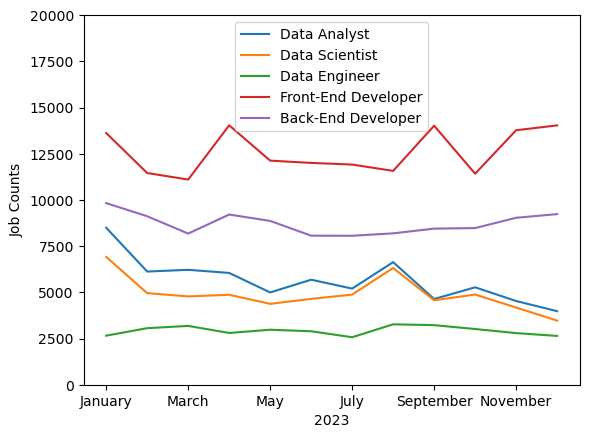

In [23]:
df_us_pivot_merge[top_5].plot(kind = "line")
plt.xlabel("2023")
plt.ylabel("Job Counts")
plt.ylim(0,20000)
plt.legend()
plt.show()